<center>
    <h1> Qiskit Metal:
        <br />
        A full-stack SC quantum chip design tool
    </h1>
</ center>

<br />
<br />
<br />
<center>
    This presentation is intended for 2022 Annual Symposium.
</ center>

<br />

<center> <u> Huiqi Xue at Jan 16ᵗʰ, 2023 </u> </center>

Qiskit Metal: A full-stack SC quantum chip design tool

**Contents**

- What Metal does
- Create a design
- Analyze the design
- Sweep data
- Hamiltonian analysis

---
**Contents**

- ▶ What Metal does
- Create a design
- Analyze the design
- Sweep data
- Hamiltonian analysis



## What metal does


**You'll use Qiskit Metal in 4 stages**

1. Choose a design class to instantiate.
2. Add and modify components (qubits, coplanar wave guides, etc.).
3. With the aid of Ansys, use *Lumped Object Model* (LOM) or *Energy Participation Ratio* (EPR) method to analyze.
4. Export to GDS file for Fabrication.

- A visualization

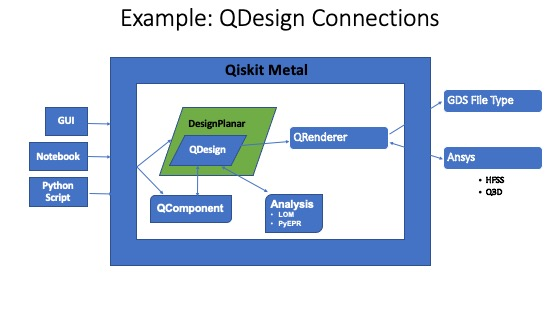

---
**Contents**

- What Metal does
- ▶ Create a design
- Analyze the design
- Sweep data
- Hamiltonian analysis


## Create a design

- Initiate a design class
- Add a default transmon
- Add a transmon with 4 connection pads
- Create a chip with 4 qubits
- Connect the qubits with CPW
- Various types of routes
- The power of programming

### Initiate a design class

In [ ]:
import qiskit_metal as metal
from qiskit_metal import designs, draw, MetalGUI

In [ ]:
design = designs.DesignPlanar()

design.overwrite_enabled = True

In [ ]:
# We can also check all of the chip properties to see if we want to change the size or any other parameter. 
# By default the name of chip is "main".
design.chips.main

{'material': 'silicon',
 'layer_start': '0',
 'layer_end': '2048',
 'size': {'center_x': '0.0mm',
  'center_y': '0.0mm',
  'center_z': '0.0mm',
  'size_x': '9mm',
  'size_y': '6mm',
  'size_z': '-750um',
  'sample_holder_top': '890um',
  'sample_holder_bottom': '1650um'}}

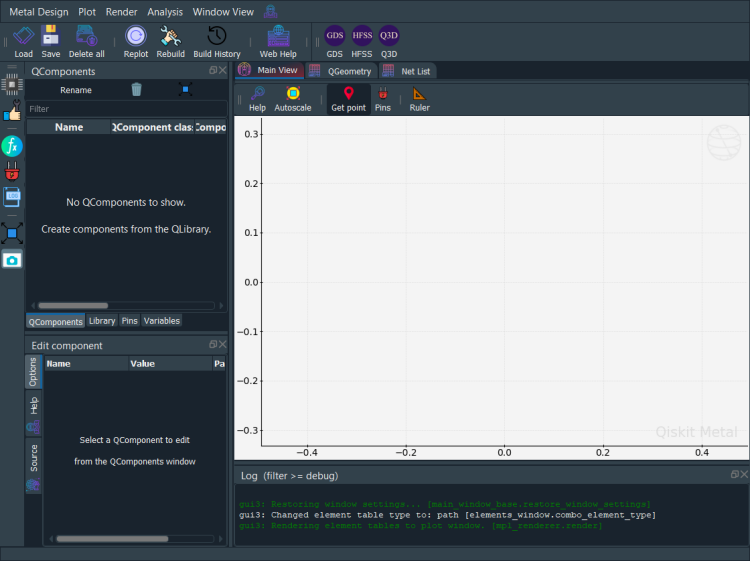

In [ ]:
gui = MetalGUI(design)
gui.screenshot()

### Add a default transmon

In [ ]:
# Select a QComponent to create (The QComponent is a python class named `TransmonPocket`)
from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket

# Create a new qcomponent object with name 'Q1' 
q1 = TransmonPocket(design, 'Q1')

gui.rebuild()  # rebuild the design and plot 

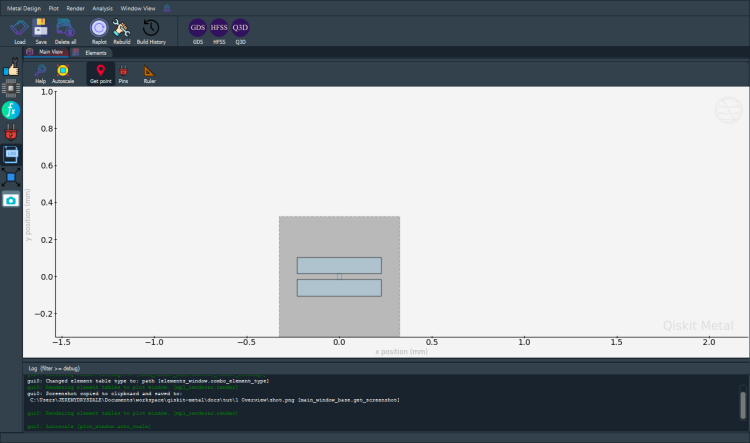

In [ ]:
gui.screenshot()

In [ ]:
q1 #print Q1 information

name:    Q1
class:   TransmonPocket        
options: 
  'pos_x'             : '0.0um',                      
  'pos_y'             : '0.0um',                      
  'orientation'       : '0.0',                        
  'chip'              : 'main',                       
  'layer'             : '1',                          
  'connection_pads'   : {
       'a'                 : {
            'pad_gap'           : '15um',                       
            'pad_width'         : '125um',                      
            'pad_height'        : '30um',                       
            'pad_cpw_shift'     : '5um',                        
            'pad_cpw_extent'    : '25um',                       
            'cpw_width'         : 'cpw_width',                  
            'cpw_gap'           : 'cpw_gap',                    
            'cpw_extend'        : '100um',                      
            'pocket_extent'     : '5um',                        
            'pocket_rise'    

### Add a transmon with 4 connection pads

In [ ]:
from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket

design.delete_all_components()

options = dict(
    pad_width = '425 um', 
    pocket_height = '650um',
    connection_pads=dict(  # pin connecotrs
        a = dict(loc_W=+1,loc_H=+1), 
        b = dict(loc_W=-1,loc_H=+1, pad_height='30um'),
        c = dict(loc_W=+1,loc_H=-1, pad_width='200um'),
        d = dict(loc_W=-1,loc_H=-1, pad_height='50um')
    )
)

q1 = TransmonPocket(design, 'Q1', options = dict(pos_x='+0.5mm', pos_y='+0.5mm', **options))

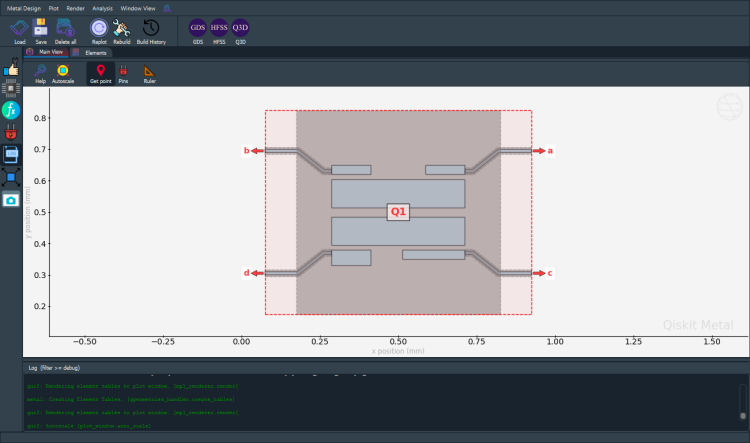

In [ ]:
gui.screenshot()

### Create a chip with 4 qubits

In [ ]:
design.delete_all_components() 
gui.rebuild() # refresh

Same option for every qubit

In [ ]:
from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket

# Allow running the same cell here multiple times to overwrite changes
design.overwrite_enabled = True

## Custom options for all the transmons
options = dict(
    # Some options we want to modify from the deafults
    # (see below for defaults)
    pad_width = '425 um', 
    pocket_height = '650um',
    # Adding 4 connectors (see below for defaults)
    connection_pads=dict( 
        a = dict(loc_W=+1,loc_H=+1), 
        b = dict(loc_W=-1,loc_H=+1, pad_height='30um'),
        c = dict(loc_W=+1,loc_H=-1, pad_width='200um'),
        d = dict(loc_W=-1,loc_H=-1, pad_height='50um')
    )
)

In [ ]:
## Create 4 transmons

q1 = TransmonPocket(design, 'Q1', options = dict(
    pos_x='+2.55mm', pos_y='+0.0mm', **options))
q2 = TransmonPocket(design, 'Q2', options = dict(
    pos_x='+0.0mm', pos_y='-0.9mm', orientation = '90', **options))
q3 = TransmonPocket(design, 'Q3', options = dict(
    pos_x='-2.55mm', pos_y='+0.0mm', **options))
q4 = TransmonPocket(design, 'Q4', options = dict(
    pos_x='+0.0mm', pos_y='+0.9mm', orientation = '90', **options))

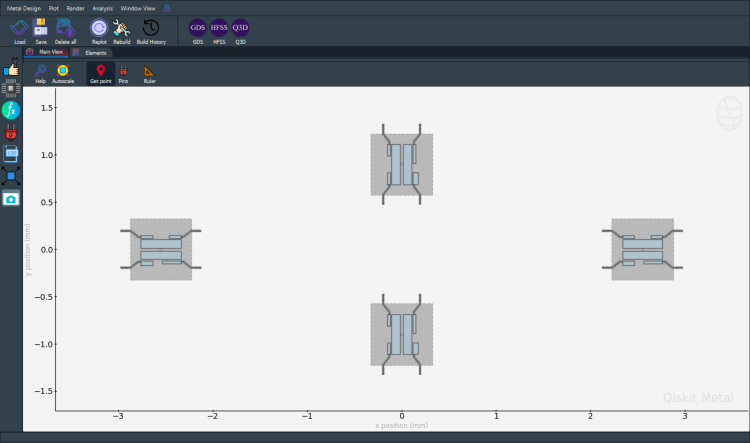

In [ ]:
gui.screenshot()

### Connect the qubits with CPW

In [ ]:
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander

Same option for every CPW.

In [ ]:
options = Dict(
    meander=Dict(
        lead_start='0.1mm',
        lead_end='0.1mm',
        asymmetry='0 um')
)

Define a `connect()` function that connects `component1@pin1` and `component2@pin2` and return an object of `RouteMeander`

In [ ]:
def connect(component_name: str, component1: str, pin1: str, component2: str, pin2: str,
            length: str,
            asymmetry='0 um', flip=False):
    """Connect two pins with a CPW."""
    myoptions = Dict(
        pin_inputs=Dict(
            start_pin=Dict(
                component=component1,
                pin=pin1),
            end_pin=Dict(
                component=component2,
                pin=pin2)),
        lead=Dict(
            start_straight='0.13mm'
        ),
        total_length=length,
    fillet = '90um')
    myoptions.update(options)
    myoptions.meander.asymmetry = asymmetry
    myoptions.meander.lead_direction_inverted = 'true' if flip else 'false'
    return RouteMeander(design, component_name, myoptions)

In [ ]:
asym = 150
cpw1 = connect('cpw1', 'Q1', 'd', 'Q2', 'c', '6.0 mm', f'+{asym}um')
cpw2 = connect('cpw2', 'Q3', 'c', 'Q2', 'a', '6.1 mm', f'-{asym}um', flip=True)
cpw3 = connect('cpw3', 'Q3', 'a', 'Q4', 'b', '6.0 mm', f'+{asym}um')
cpw4 = connect('cpw4', 'Q1', 'b', 'Q4', 'd', '6.1 mm', f'-{asym}um', flip=True)

gui.rebuild()
gui.autoscale()

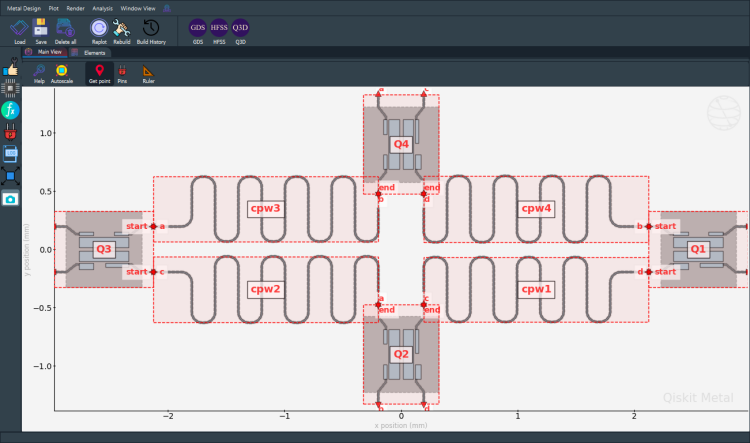

In [ ]:
gui.screenshot()

### Various types of routes

- Create any shape of route you like.

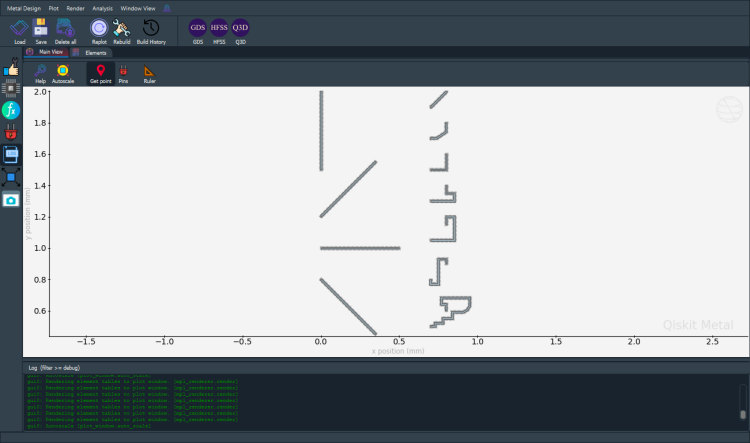

In [ ]:
gui.screenshot()

- Basic class: `RouteMeander`

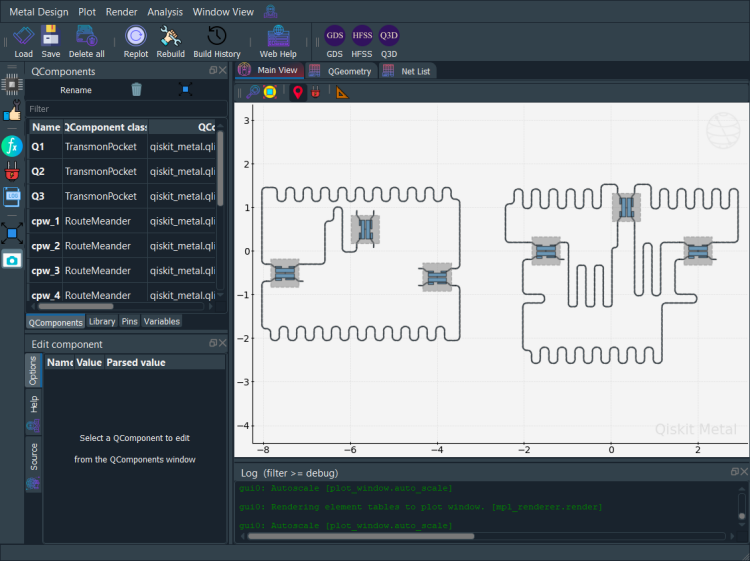

<!-- 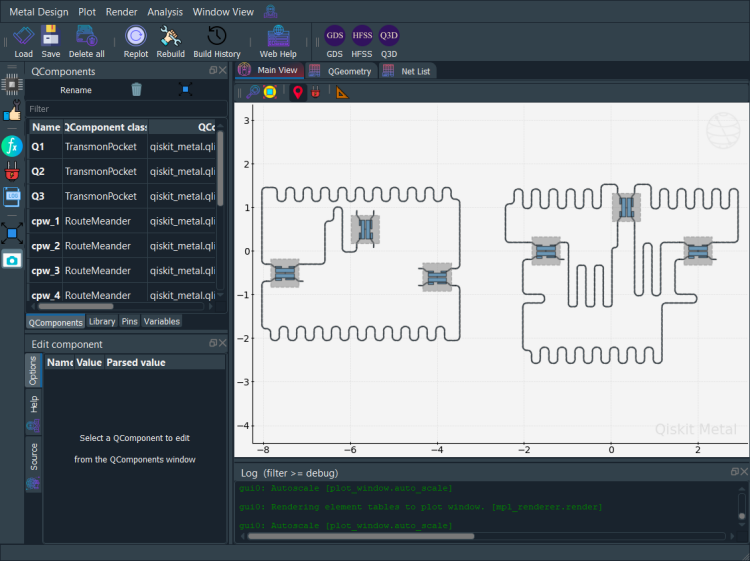 -->

- You can also anchor some points for a route, and let Metal find the path.

Basic class: `RoutePathfinder`

In [ ]:
anchors = OrderedDict()
anchors[0] = np.array([-0.452, -0.555])
anchors[1] = np.array([-0.452, -1.5])
anchors[2] = np.array([0.048, -1.5])

options = {'pin_inputs': 
            {'start_pin': {'component': 'Q0', 'pin': 'b'}, 
             'end_pin': {'component': 'Q1', 'pin': 'b'}},
            'lead': {'start_straight': '91um', 'end_straight': '90um'},
            'step_size': '0.25mm',
            'anchors': anchors,
            **ops
           }

qa = RoutePathfinder(design, 'line', options)

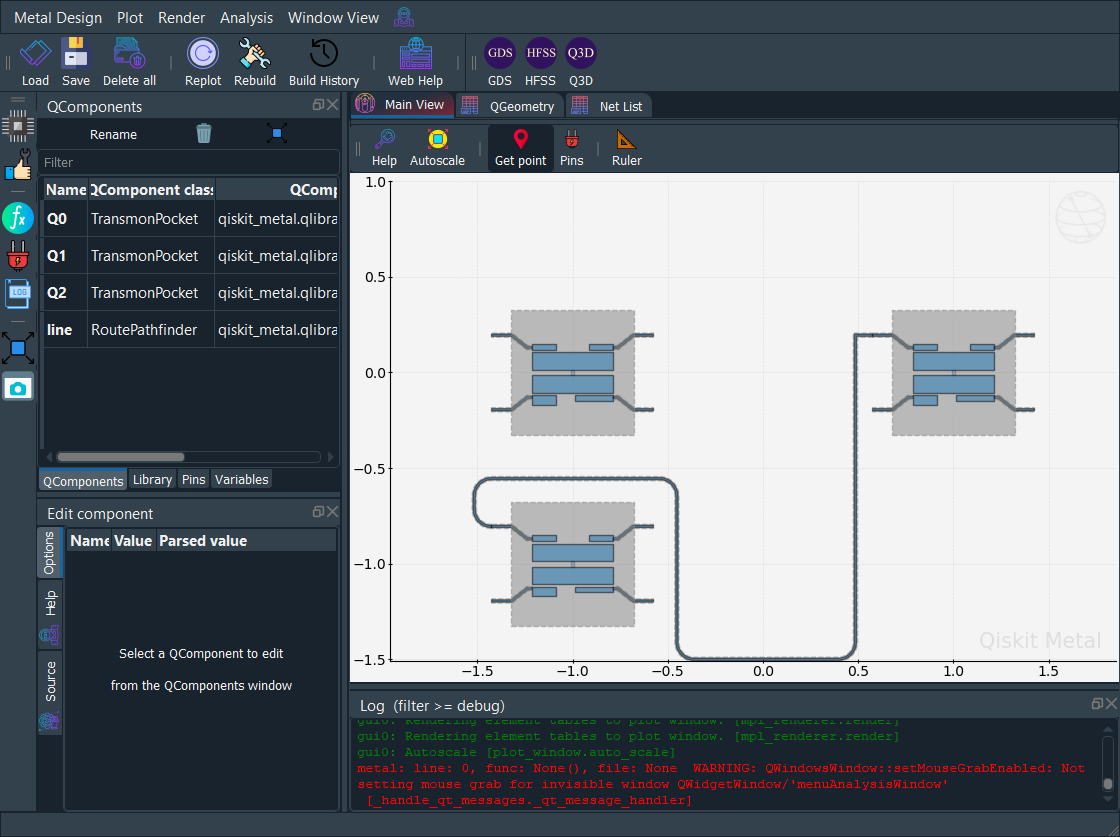


<!-- 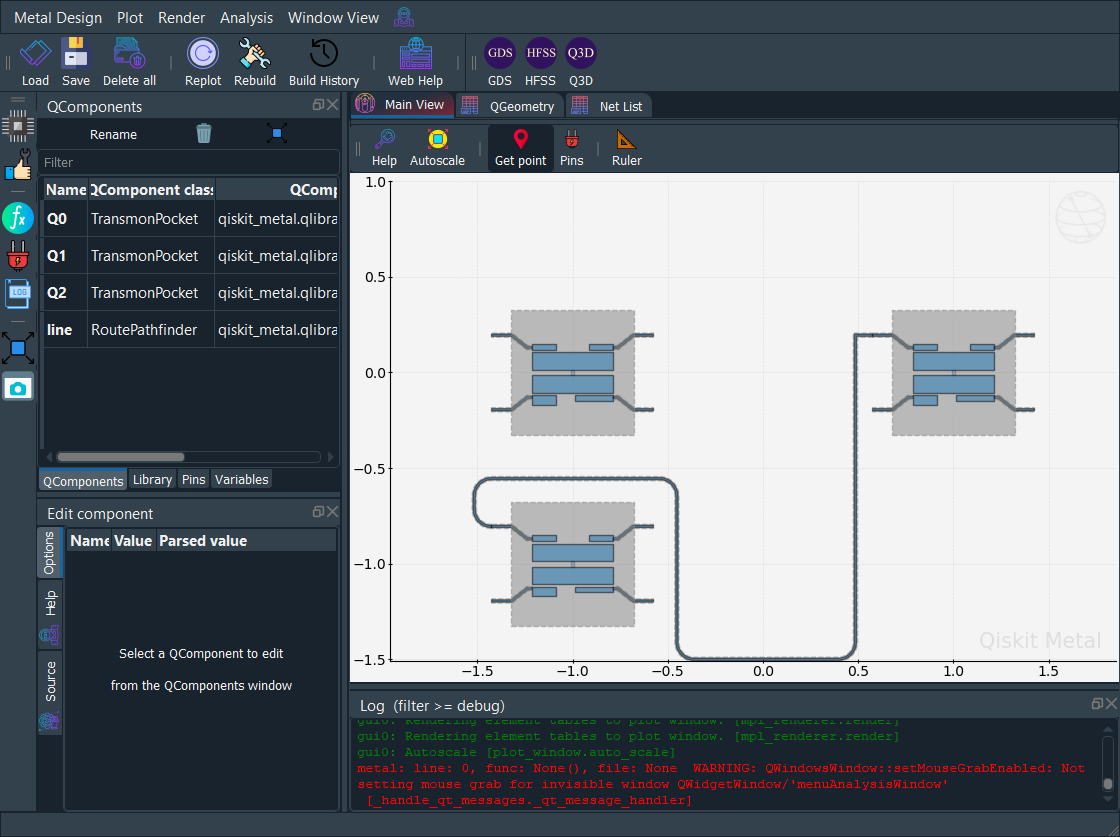 -->

### The power of programming

In [ ]:
N_x =4
N_y =3

First we generate the qubits.

In [ ]:
#Loop to generate and draw the qubits
for x in range(N_x):
    for y in range(N_y):
        options = dict(...)
        obj=TransmonPocket(design,'Q_'+str(x)+'_'+str(y),options)

Next, we generate the route meanders.

In [ ]:
for x in range(N_x):
    for y in range(N_y):
        #"upward" connection
        if y<(N_y-1):
            connectorAD = RouteMeander(...)
        #"sideways" connection
        if x<(N_x-1) and (not(x%2 and y==(N_y-1))):
            connectorBC = RouteMeander(...)

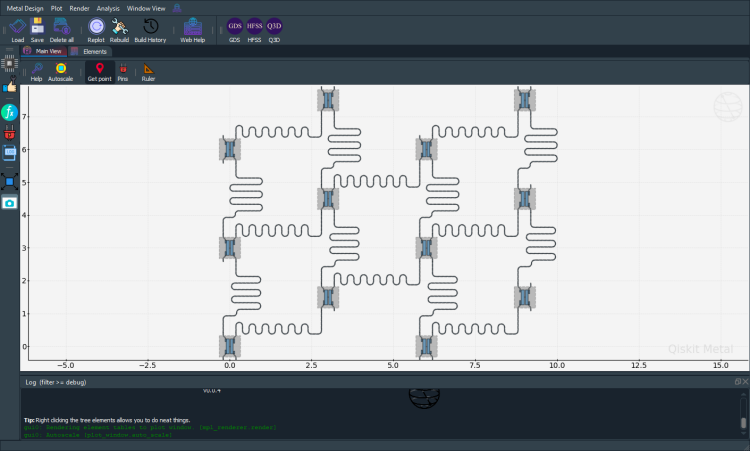

In [ ]:
gui.screenshot()

---
**Contents**

- What Metal does
- Create a design
- ▶ Analyze the design
- Sweep data
- Hamiltonian analysis



## Analyze the design


- LOM analysis
- EPR analysis for 1 qubit
- EPR analysis for qubit-resonator system

### LOM analysis

Lumped Object Model method.

1. Create a design with 4 qb and 4 cpws.

In [ ]:
design = designs.DesignPlanar()

# Add qubits...
TransmonPockets(...)
# Add routes...
RouteMeander(...)

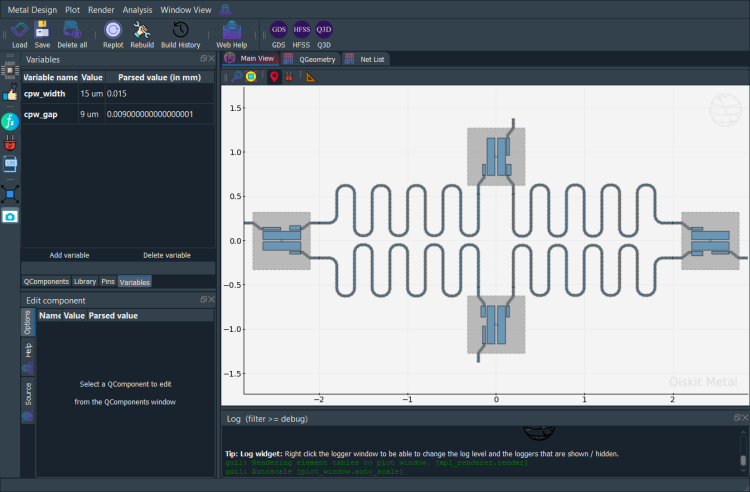

In [ ]:
gui.screenshot()

2. Initialize an `LOManalysis`

In [ ]:
from qiskit_metal.analyses.quantization import LOManalysis

analysis = LOManalysis(design, "q3d")

In [ ]:
analysis.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'freq_ghz': 5.0,
 'save_fields': False,
 'enabled': True,
 'max_passes': 15,
 'min_passes': 2,
 'min_converged_passes': 2,
 'percent_error': 0.5,
 'percent_refinement': 30,
 'auto_increase_solution_order': True,
 'solution_order': 'High',
 'solver_type': 'Iterative'}

3. Run *finite element analysis* with Ansys to calculate **capacitance matrix**.

In [ ]:
analysis.sim.setup.freq_ghz = 4.8
# vvvvvvvvvvvvvvvvvv
analysis.sim.run()
# ^^^^^^^^^^^^^^^^^^
analysis.sim.capacitance_matrix

,bus1_connector_pad_Q1,bus2_connector_pad_Q1,ground_main_plane,pad_bot_Q1,pad_top_Q1,readout_connector_pad_Q1
bus1_connector_pad_Q1,49.77794,-0.42560,-33.50861,-1.57029,-13.15538,-0.20494
bus2_connector_pad_Q1,-0.42560,54.01885,-35.77522,-13.99741,-1.82852,-1.01319
ground_main_plane,-33.50861,-35.77522,237.69029,-31.53485,-37.88741,-36.55732
pad_bot_Q1,-1.57029,-13.99741,-31.53485,98.20667,-30.07382,-18.86490
pad_top_Q1,-13.15538,-1.82852,-37.88741,-30.07382,87.85076,-2.20122
readout_connector_pad_Q1,-0.20494,-1.01319,-36.55732,-18.86490,-2.20122,59.92347


4. Use capacitance matrix to perform LOM analysis to get $f_Q, E_J, E_C$ etc.

In [ ]:
analysis.setup.junctions = Dict({'Lj': 12.31, 'Cj': 2})
analysis.setup.freq_readout = 7.0
analysis.setup.freq_bus = [6.0, 6.2]

# vvvvvvvvvvvvvvvvvv
analysis.run_lom()
# ^^^^^^^^^^^^^^^^^^

analysis.lumped_oscillator_all

[3, 4] [5 0 1]
Predicted Values

Transmon Properties
f_Q 5.424935 [GHz]
EC 311.976959 [MHz]
EJ 13.273404 [GHz]
alpha -363.792421 [MHz]
dispersion 46.550369 [KHz]
Lq 12.305036 [nH]
Cq 62.088650 [fF]
T1 35.336766 [us]

**Coupling Properties**

tCqbus1 7.383750 [fF]
gbus1_in_MHz 114.265793 [MHz]
χ_bus1 -3.174191 [MHz]
1/T1bus1 2809.277762 [Hz]
T1bus1 56.653331 [us]

tCqbus2 -6.455281 [fF]
gbus2_in_MHz -85.831803 [MHz]
χ_bus2 -9.970470 [MHz]
1/T1bus2 1205.469467 [Hz]
T1bus2 132.027353 [us]

tCqbus3 5.372192 [fF]
gbus3_in_MHz 73.765178 [MHz]
χ_bus3 -4.515417 [MHz]
1/T1bus3 489.200415 [Hz]
T1bus3 325.336893 [us]
Bus-Bus Couplings
gbus1_2 7.097123 [MHz]
gbus1_3 9.957495 [MHz]
gbus2_3 5.377146 [MHz]


,fQ,EC,EJ,alpha,dispersion,gbus,chi_in_MHz,χr MHz,gr MHz
1,5.748104,353.230672,13.273404,-417.375147,135.208268,"[108.79200978040816, -73.21708181328188, 76.45...","[-4.790610087146514, -26.5770698752867, -12.45...",4.790610,108.792010
2,5.664672,342.295447,13.273404,-403.045739,103.898327,"[112.48401834623373, -82.16156406673579, 68.80...","[-4.4594265208402275, -22.018835553935766, -7....",4.459427,112.484018
3,5.574019,330.639537,13.273404,-387.872732,77.330688,"[111.33612864790418, -84.09226785308748, 71.77...","[-3.7804661114555205, -15.865600375824991, -6....",3.780466,111.336129
4,5.523032,324.186357,13.273404,-379.516629,65.212167,"[110.99790102064628, -84.10822360591214, 72.87...","[-3.4720716615303537, -13.185856349486748, -5....",3.472072,110.997901
5,5.463772,316.778339,13.273404,-369.962716,53.275261,"[113.07905190117796, -84.87724687606234, 72.79...","[-3.293717894242756, -11.011779798984726, -4.8...",3.293718,113.079052
6,5.424935,311.976959,13.273404,-363.792421,46.550369,"[114.26579286281127, -85.83180315154853, 73.76...","[-3.1741912468040616, -9.970469520050226, -4.5...",3.174191,114.265793


### EPR analysis for 1 qubit

Energy Participation Ratio method.

1. Initialize `EPRanalysis`

In [ ]:
from qiskit_metal.analyses.quantization import EPRanalysis

analysis_qb = EPRanalysis(design, "hfss")

In [ ]:
# example: update single setting
analysis_qb.sim.setup.max_passes = 6
analysis_qb.sim.setup.vars.Lj = '11 nH'
# example: update multiple settings
analysis_qb.sim.setup_update(max_delta_f = 0.4, min_freq_ghz = 1.1)

pprint(analysis.sim.setup)

{'basis_order': 1,
 'max_delta_f': 0.4,
 'max_passes': 6,
 'min_converged': 1,
 'min_freq_ghz': 1.1,
 'min_passes': 1,
 'n_modes': 1,
 'name': 'Setup',
 'pct_refinement': 30,
 'reuse_selected_design': True,
 'reuse_setup': True,
 'vars': {'Cj': '0 fF', 'Lj': '11 nH'}}


2. Analyze eigenmodes of Q1

In [ ]:
analysis_qb.sim.run(name="Qbit", components=['Q1'], open_terminations=[], box_plus_buffer = False)

3. Convergence plot

In [ ]:
analysis_qb.sim.plot_convergences()

In [ ]:
analysis_qb.sim.convergence_f

,re(Mode(1)) [g]
Pass [],
1,3.131869
2,4.754418
3,5.835043
4,6.044299
5,6.162997
6,6.225912


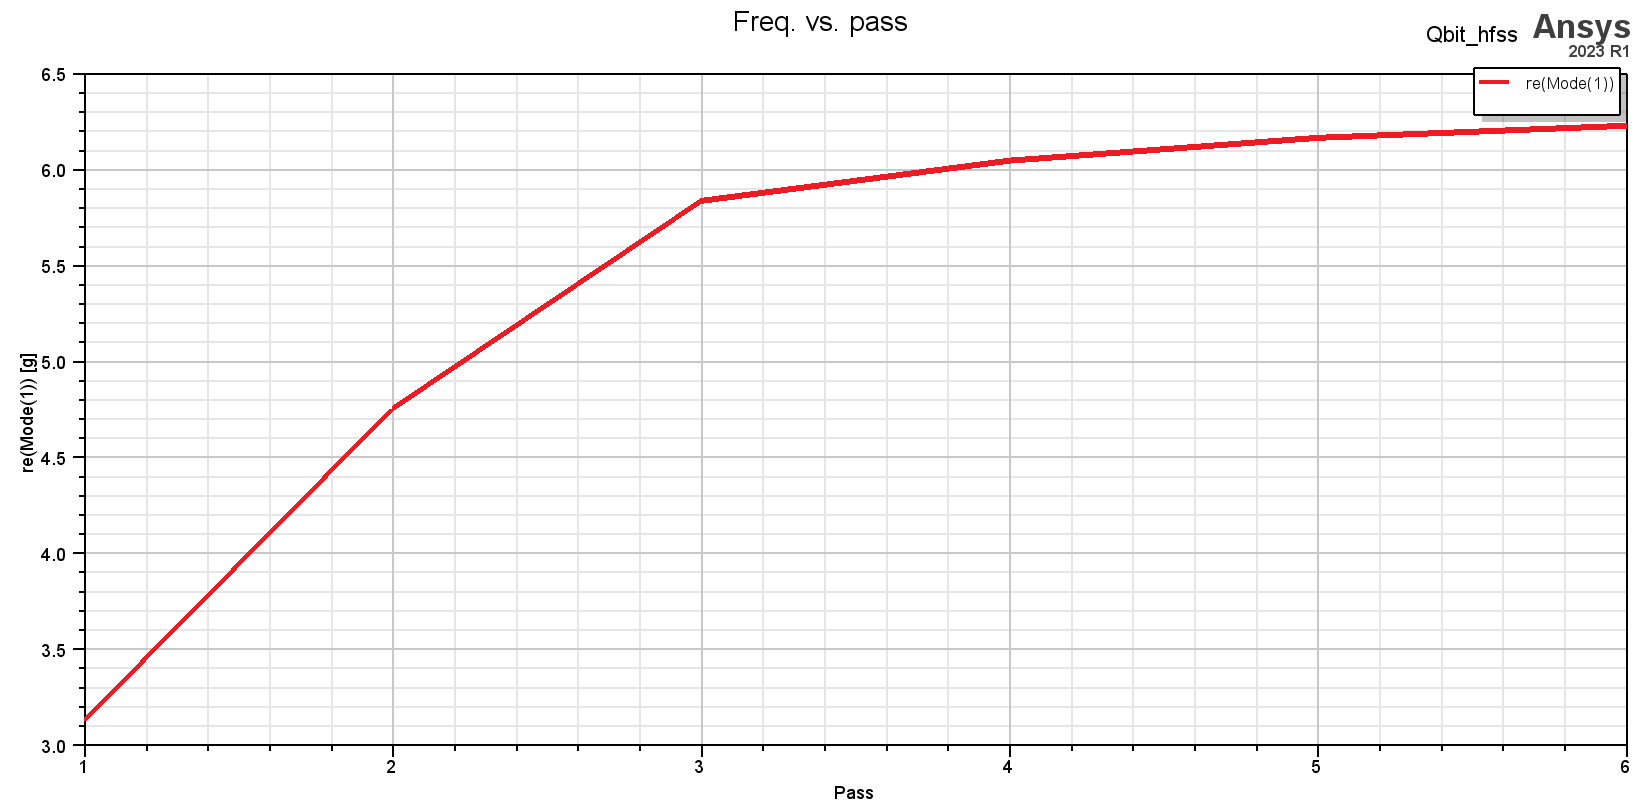

In [ ]:
analysis_qb.sim.save_screenshot()

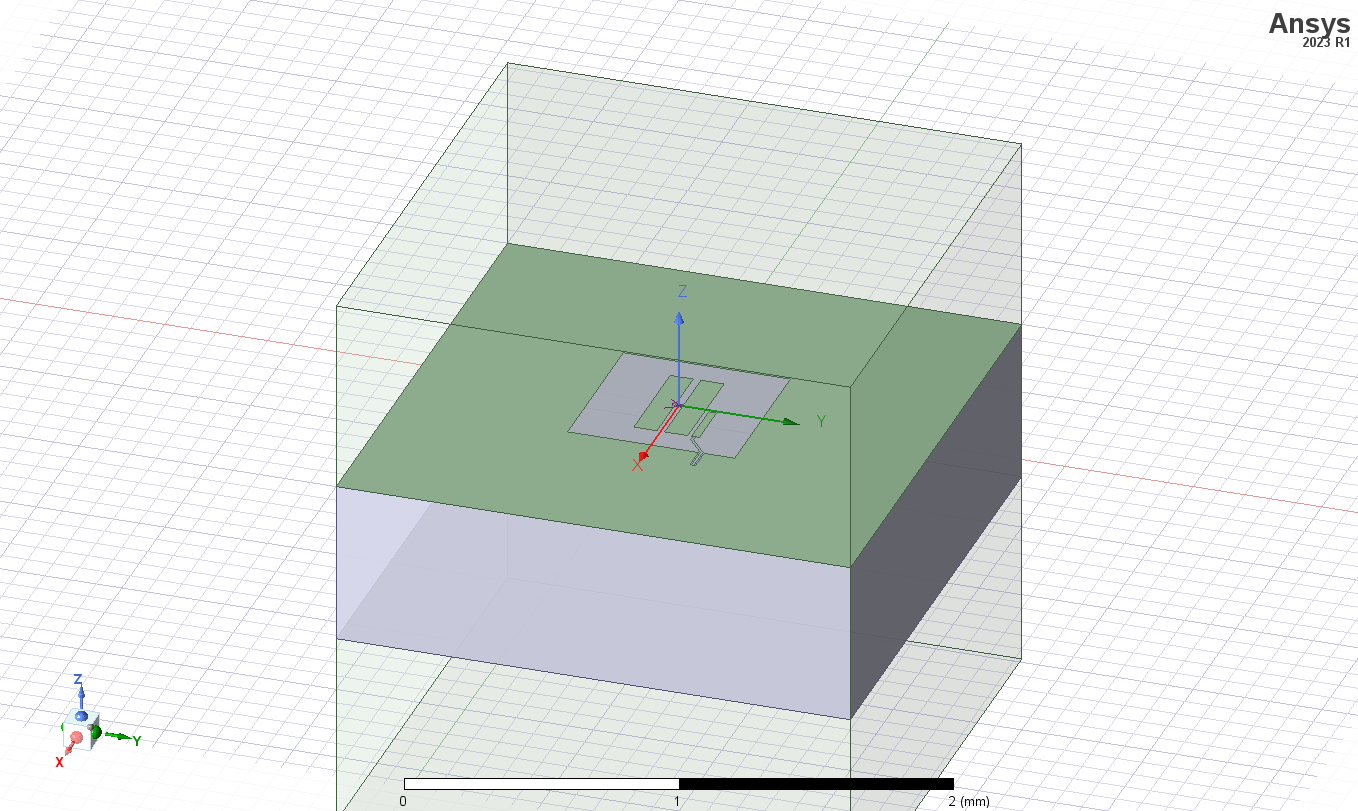

In [ ]:
analysis_qb.sim.plot_fields('main')
analysis_qb.sim.save_screenshot()

Chip's E-field

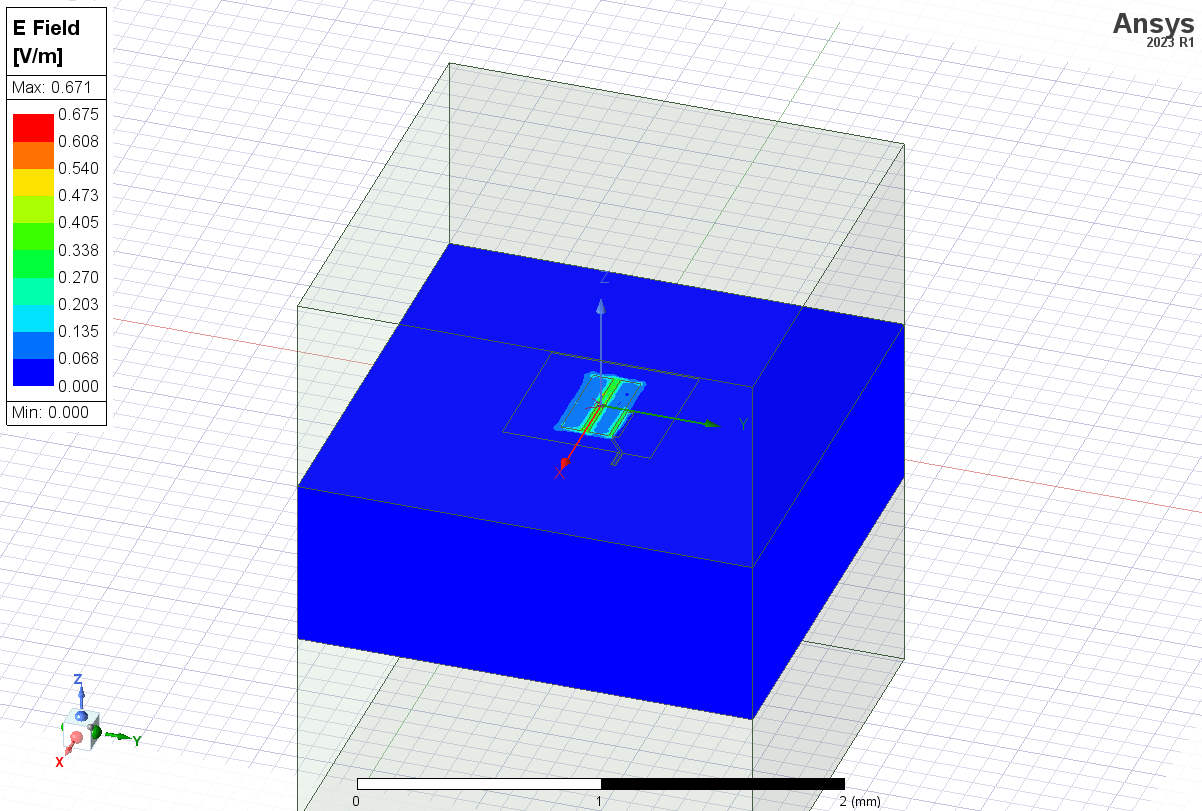

Run EPR!

In [ ]:
analysis_qb.run_epr()

Design "Qbit_hfss" info:
	# eigenmodes    1
	# variations    1
Design "Qbit_hfss" info:
	# eigenmodes    1
	# variations    1

        energy_elec_all       = 7.72550321519752e-24
        energy_elec_substrate = 7.10552481480507e-24
        EPR of substrate = 92.0%

        energy_mag    = 4.02001475936871e-26
        energy_mag % of energy_elec_all  = 0.5%
        

Variation 0  [1/1]

  Mode 0 at 6.22 GHz   [1/1]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.5%  3.863e-24  2.01e-26

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 96.75%
	jj              0.904053  (+)        0.0304046
		(U_tot_cap-U_tot_ind)/mean=6.25%
Calculating Qdielectric_main for mode 0 (0/0)
p_dielectric_main_0 = 0.9197491240217418


WARNING 10:36PM [__init__]: <p>Error: <class 'IndexError'></p>



ANALYSIS DONE. Data saved to:

C:\data-pyEPR\Project28\Qbit_hfss\2021-08-09 22-36-24.npz


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0    1.133646
dtype: float64

Pm_norm idx =
     jj
0  True
*** P (participation matrix, not normlz.)
         jj
0  0.877377

*** S (sign-bit matrix)
   s_jj
0     1
*** P (participation matrix, normalized.)
      0.99

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       322

*** Chi matrix ND (MHz) 
       361

*** Frequencies O1 PT (MHz)
0    5900.50314
dtype: float64

*** Frequencies ND (MHz)
0    5881.63372
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0]


#### Mode frequencies (MHz)

###### Numerical diagonalization

Lj,11
eigenmode,
0,5900.5


#### Kerr Non-linear coefficient table (MHz)

###### Numerical diagonalization

,,0
Lj,,
11,0,361.39


### EPR analysis for qubit-resonator system

Energy Participation Ratio method

Add a resonator to design

In [ ]:
RouteMeander(design, ...)

Initialize a new analysis object.

We need to analyze 2 modes for there are two components.

In [ ]:
analysis_q_res = EPRanalysis(design, "hfss")

analysis_q_res.sim.setup.n_modes = 2
analysis_q_res.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'min_freq_ghz': 1,
 'n_modes': 2,
 'max_delta_f': 0.5,
 'max_passes': 10,
 'min_passes': 1,
 'min_converged': 1,
 'pct_refinement': 30,
 'basis_order': 1,
 'vars': {'Lj': '10 nH', 'Cj': '0 fF'}}

Use Ansys to calculate eigen modes.

In [ ]:
analysis_q_res.sim.run(name="TransmonResonator",
                 components=['Q1', 'readout', 'open_to_ground'],
                 open_terminations=[('readout', 'end')])
analysis_q_res.sim.plot_convergences()

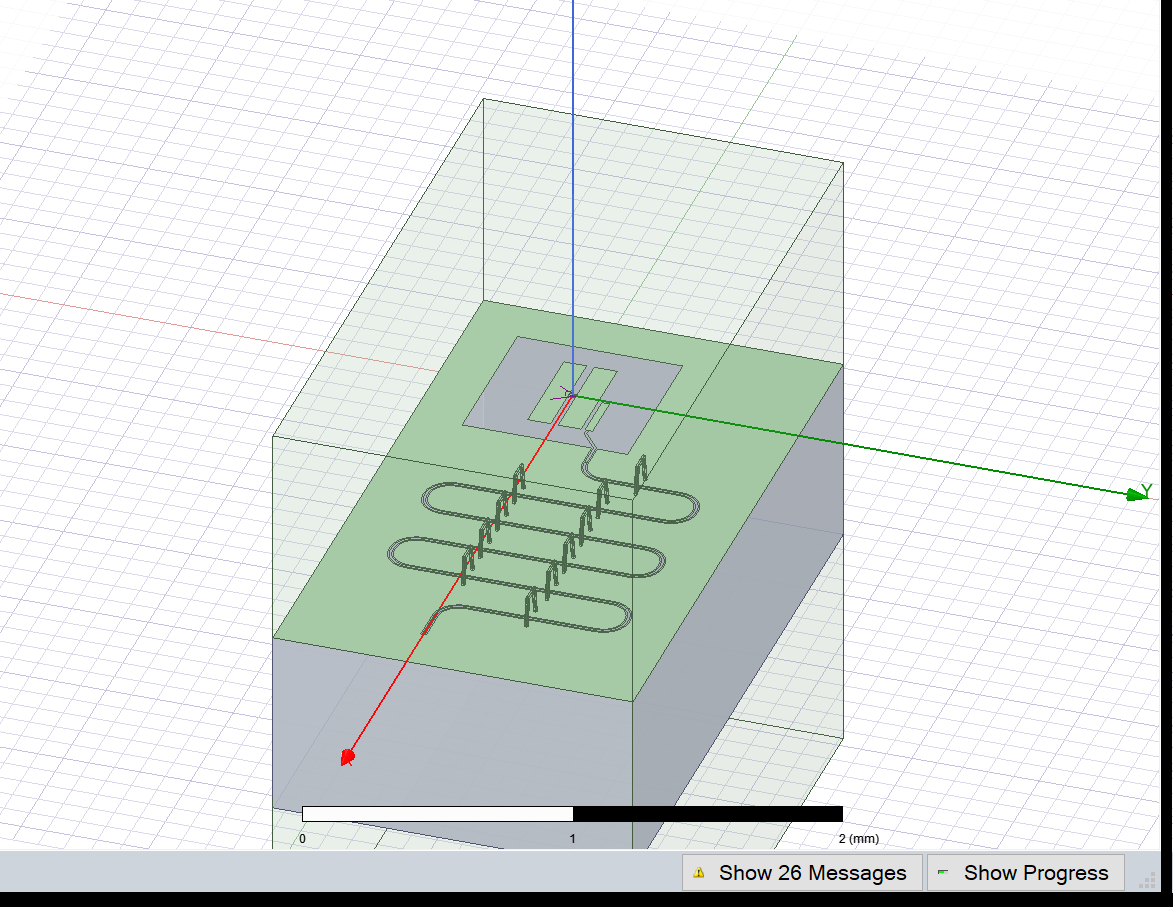

WindowsPath('C:/_code_ibmq/qiskit-metal-public/docs/tut/4-Analysis/ansys.png')

In [ ]:
analysis_q_res.sim.save_screenshot()  # optional

INFO 10:43PM [get_setup]: 	Opened setup `Setup1`  (<class 'pyEPR.ansys.HfssEMSetup'>)


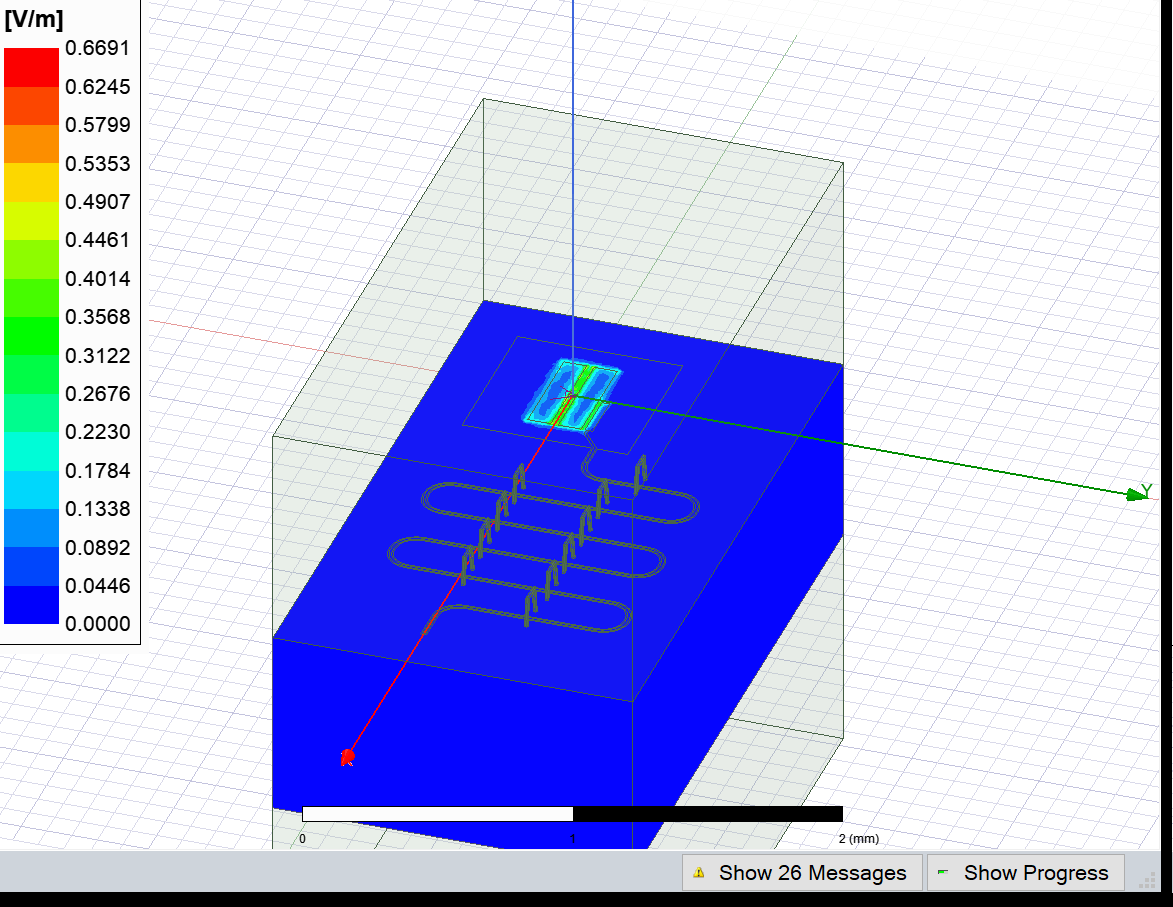

WindowsPath('C:/_code_ibmq/qiskit-metal-public/docs/tut/4-Analysis/ansys.png')

In [ ]:
analysis_q_res.sim.plot_fields('main', eigenmode=1)
analysis_q_res.sim.save_screenshot()

Run EPR!

In [ ]:
analysis_q_res.run_epr()

Design "TransmonResonator_hfss" info:
	# eigenmodes    2
	# variations    1
Design "TransmonResonator_hfss" info:
	# eigenmodes    2
	# variations    1

        energy_elec_all       = 7.74800096501779e-24
        energy_elec_substrate = 7.11845568544785e-24
        EPR of substrate = 91.9%

        energy_mag    = 6.71993890387355e-26
        energy_mag % of energy_elec_all  = 0.9%
        

Variation 0  [1/1]

  Mode 0 at 6.22 GHz   [1/2]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.1%  3.874e-24  3.36e-26

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 97.04%
	jj              0.990893  (+)        0.0302452
		(U_tot_cap-U_tot_ind)/mean=1.51%
Calculating Qdielectric_main for mode 0 (0/1)
p_dielectric_main_0 = 0.9187473927258998

  Mode 1 at 9.33 GHz   [2/2]
    Calculating ℰ_magnetic,ℰ_electr

WARNING 10:44PM [__init__]: <p>Error: <class 'IndexError'></p>



ANALYSIS DONE. Data saved to:

C:\data-pyEPR\Project28\TransmonResonator_hfss\2021-08-09 22-43-59.npz


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0    1.030829
1    1.031477
dtype: float64

Pm_norm idx =
      jj
0   True
1  False
*** P (participation matrix, not normlz.)
         jj
0  0.961803
1  0.003053

*** S (sign-bit matrix)
   s_jj
0     1
1     1
*** P (participation matrix, normalized.)
      0.99
    0.0031

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       291     2.69
      2.69   0.0062

*** Chi matrix ND (MHz) 
       324     2.29
      2.29  0.00453

*** Frequencies O1 PT (MHz)
0    5925.626329
1    9326.061633
dtype: float64

*** Frequencies ND (MHz)
0    5910.137715
1    9326.115494
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0, 1]


Mode frequencies (MHz)

Numerical diagonalization

Lj,10
eigenmode,
0,5925.63
1,9326.06


Kerr Non-linear coefficient table (MHz)

Numerical diagonalization

0         1
Lj                    
10 0  323.51  2.29e+00
   1    2.29  4.53e-03

---
**Contents**

- What Metal does
- Create a design
- Analyze the design
- ▶ Sweep data
- Hamiltonian analysis



## Sweep data

- Capacitance matrix
- Eigenmode matrix

### Capacitance matrix

Lumped Objecgt Model method

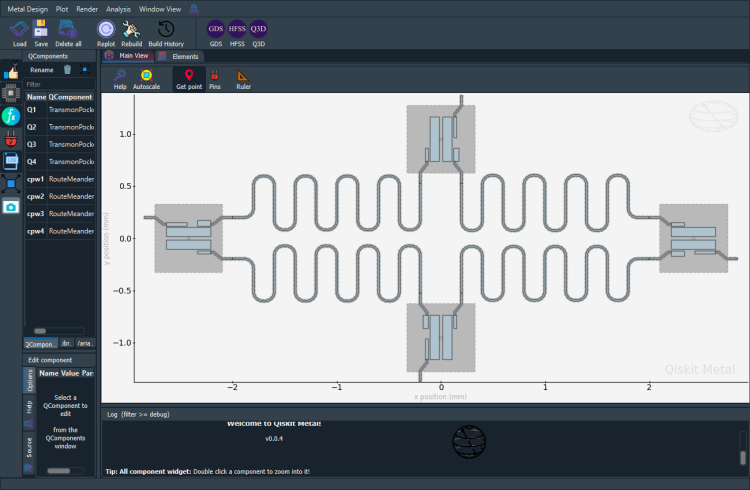

In [ ]:
design = designs.DesignPlanar()
...
gui.screenshot()

In [ ]:
c1 = LOManalysis(design, "q3d")

Prepare data to pass as arguments for method run_sweep().

In [ ]:
render_design_argument_qcomps = ['Q1']

render_design_argument_endcaps = [('Q1', 'readout'), ('Q1', 'bus1'),('Q1', 'bus2')]


Sweep the qubit-1's `pad_gap`.

In [ ]:
sweep_data, return_code = c1.run_sweep(q1.name,
                                       'pad_gap',
                                       ['20um', '30um', '40um'],
                                       render_design_argument_qcomps,
                                       render_design_argument_endcaps,
                                       design_name="GetCapacitance",
                                       box_plus_buffer=True)

Sweep data is stored for each sweep value.

In [ ]:
sweep_data.keys()

dict_keys(['20um', '30um', '40um'])

Let's see $E_C$ for each `pad_gap` value.

In [ ]:
from pandas import DataFrame

ec_val = []
for opt_val in sweep_data.keys():
    ec_val.append([opt_val,sweep_data[opt_val]['variables']['lumped_oscillator']['EC']])

df=DataFrame(ec_val,columns = ['Sweep Value', 'Ec'])
df

,Sweep Value,Ec
0,20um,284.490474
1,30um,307.600806
2,40um,324.747859


### Eigenmode matrix

Energy Participation Ratio method

Sweep the readout resonator's `total_length`.

In [ ]:
all_sweeps, return_code = eig_qres.run_sweep(readout.name,
                                             'total_length', 
                                             ['10mm', '11mm', '12mm'],
                                             render_qcomps,
                                             open_terminations,
                                             ignored_jjs=render_ignored_jjs,
                                             design_name="GetEigenModeSolution", 
                                             box_plus_buffer=box_plus_buffer)

Sweep data is stored for each sweep value.

In [ ]:
all_sweeps.keys()

dict_keys(['10mm', '11mm', '12mm'])

For example this is the data for `total_length = 10mm`

In [ ]:
all_sweeps['10mm']

{'option_name': 'total_length',
 'variables': {'energy_elec': 5.19788159957566e-25,
  'energy_elec_sub': 4.2287113157029e-25,
  'energy_mag': 8.01738203686217e-27},
 'sim_variables': {'sim_setup_name': 'sweeper_em_setup',
  'convergence_t':              Solved Elements  Max Delta Freq. %
  Pass Number                                    
  1                      12372                NaN
  2                      16089           46.90700
  3                      20923           26.83400
  4                      27201           12.39700
  5                      35009            5.13720
  6                      45251            3.05090
  7                      58833            1.58050
  8                      76494            1.37040
  9                      99448            0.75837
  10                    129285            0.63878
  11                    168080            0.27581
  12                    218509            0.35048
  13                    284068            0.39353
  14       

In [ ]:
all_sweeps['10mm']['sim_variables']['convergence_f']

,re(Mode(1)) [g],re(Mode(2)) [g]
Pass [],,
1,5.569390,11.880396
2,4.638777,6.307600
3,5.883535,7.416275
4,6.612905,7.967902
5,6.952620,8.203356
6,7.139302,8.453635
7,7.252139,8.571936
8,7.325233,8.689408
9,7.365970,8.755306


---
**Contents**

- What Metal does
- Create a design
- Analyze the design
- Sweep data
- ▶ Hamiltonian analysis




## Hamiltonian analysis

- QHO wave function plot
- Cooper-pair-box Hamiltonian and eigenvalue plot
- Charge Dispersion
- Energy Level Differences
- Anharmonicity
- Dephasing Time (T2)

### QHO wave function plot

Quantum Harmonic Oscillator with Metal built-in function

In [ ]:
from qiskit_metal.analyses.hamiltonian.HO_wavefunctions import wavefunction

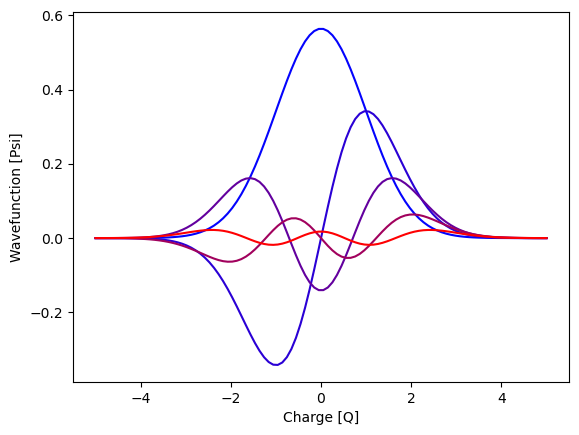

In [ ]:
# Let's define the range of x-axis values (representating charge) to be from (-5,5) 
x = np.linspace(-5,5,100)

# Let's plot the first five energy levels (N=0 through N=4) of the harmonic oscillator
# We'll just take L=C=1.0 for simplicity 
plt.plot(x, wavefunction(1.0, 1.0, 0, x), '#0403FD') # N=0; ground state (black)
plt.plot(x, wavefunction(1.0, 1.0, 1, x), '#2A00D5') # N=1; first excited state (blue)
plt.plot(x, wavefunction(1.0, 1.0, 2, x), '#63009E') # N=2; second excited state (red)
plt.plot(x, wavefunction(1.0, 1.0, 3, x), '#A1015D') # N=3; third excited state (green)
plt.plot(x, wavefunction(1.0, 1.0, 4, x), '#FE0002') # N=4; fourth excited state (yellow) 
plt.xlabel("Charge [Q]")
plt.ylabel("Wavefunction [Psi]")

# show the plot
plt.show()

### Cooper-pair-box Hamiltonian and eigenvalue plot

This module models the transmon qubit in the cooper-pair charge basis, assuming wrapped junction phase variable. The Hamiltonian is given by: 

$$
\hat{H}=4E_{C}\left(\hat{n}-n_{g}\right)-E_{J}\cos\left(\hat{\phi}\right)\,,
$$

where $E_{C}$ is the charging energy, $E_{J}$ is the Josephson energy, $\hat n$ is the number of Cooper pairs transferred between charge islands, $\hat{\phi}$ is the gauge-invariant phase difference between charge islands, and $n_{g}$ is effective offset charge of the device. Expressions for the charging energy, Josephson energy and offset charge can be written as:

$$
E_{C}=\frac{e^{2}}{2C_{\Sigma}}\,,\qquad n_{g}=-\frac{C_{d}\dot{\Phi}_{s}\left(t\right)}{2e}\:,\qquad E_{J}=\frac{\phi_{0}^{2}}{L_{J}}\,,
$$

where $C_{\Sigma} = C_{J}+C_{B}+C_{g}$ (the sum of the Josephson capacitance, shunting capacitance and gate capacitance), $L_{J}$ is the inductance of the Josephson junction, and $\phi$ is the magnetic flux. 

The variables are
$$
\hat{\phi}\equiv\frac{\hat{\Phi}}{\phi_{0}},\qquad\hat{n}\equiv\frac{\hat{Q}}{2e}\,,
$$

Observe that $\hat \phi$ and $\hat n$ are both dimensiuonless, and they obey the commutation relationship:

$$
[\hat{\phi}, \hat{n}] = i
$$


The Hamiltonian can be written in the charge ($\hat n$) basis as: 

$$H=4E_\text{C}(\hat{n}-n_g)^2-\frac{1}{2}E_\text{J}\sum_n(|n\rangle\langle n+1|+\text{h.c.}),$$
Where $\hat{n} = \sum_{n=-\inf}^{\inf} |n\rangle\langle n|$

We will use `Hcpb` class (Hamiltonian-model for cooper-pair-box) in Metal package.

In [ ]:
from qiskit_metal.analyses.hamiltonian.transmon_charge_basis import Hcpb

Create a cpb Hamiltonian with $E_C$, $E_J$ and offset charge $n_g$

In [ ]:
H_norm = Hcpb(nlevels=2, Ej=E_J, Ec=E_C, ng=0.5)

Normalize the calculated energies by the 0 → 1 transition state energy

In [ ]:
# we'll normalize the calculated energies by the 0->1 transition state energy evaluated at the degenercy point (ng=0.5)
norm = H_norm.fij(0,1)

# Next we'll empty lists to the first three eigenvalues (m=0, m=1, m=2):
E0 = [] 
E1 = [] 
E2 = []

# For a given value of offset charge (ng, represented by x) we will calculate the CPB Hamiltonian using the previously assigned values of E_J and E_C. Then we calculate the eigenvalue for a given value of m.
for i in x: 
    H = Hcpb(nlevels=3, Ej=E_J, Ec=E_C, ng=i)
    E0.append(H.evalue_k(0)/norm)
    E1.append(H.evalue_k(1)/norm)
    E2.append(H.evalue_k(2)/norm)

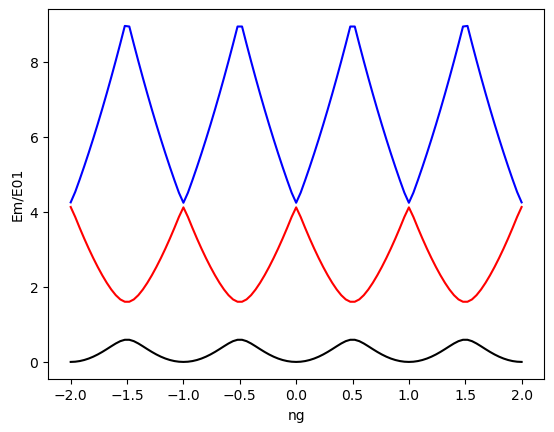

In [ ]:
# define the minimum of E0 and set this to E=0
floor = min(E0) 
 
plt.plot(x, E0 - floor, 'k')
plt.plot(x, E1 - floor, 'r')
plt.plot(x, E2 - floor, 'b')
plt.show()

### Charge Dispersion

The peak-to-peak value of the charge dispersion for the mth energy level is given by the expression: $\epsilon_{m} = E_{m}(n_{g}=0.5) - E_{m}(n_{g}=0.0)$. We can plot $\epsilon_{m}/E_{01}$ as a function of $E_{J}/E_{C}$ for the first few energy levels and reproduce the figure published in Phys. Rev. A 76, 042319 (2007) (Figure 4(a)). 

In [ ]:
x = np.linspace(1,140,101)           # this this ratio of Ej/Ec which will go on the x-axis. 
for i in x:
    E_j = i*E_c 
    H_zero = Hcpb(nlevels=15, Ej=i*E_c, Ec=E_c, ng=0.0)
    H_half = Hcpb(nlevels=15, Ej=i*E_c, Ec=E_c, ng=0.5)
    
    ...

Plot charge dispersion w.r.t. $E_{J}/E_{C}$.

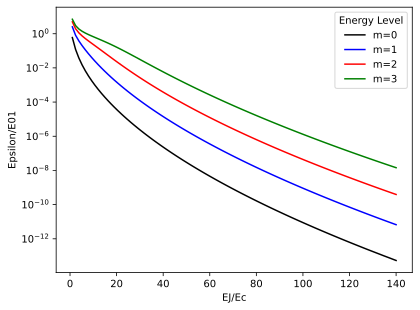

In [ ]:
plt.plot(x, epsilon0, 'k', label="m=0")
...

### Energy Level Differences

We can also evaluate the energy level difference ($E_{m0} = E_{m} - E_{0}$) evaluated at the degeneracy point ($n_{g}=0.5$) and compare to Fig. 4(b) of Phys. Rev. A 76, 042319 (2007). To do this, we just need to create empty lists for the energy levels ($E_{0}$ through $E_{3}$) as well as the energy level differences ($E_{00}$ through $E_{30}$.) 

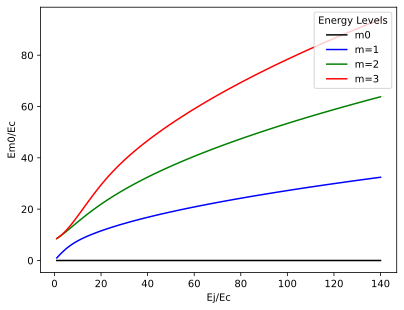

In [ ]:
plt.plot(x,E00,'k',label="m0")
...

### Anharmonicity

- We know that for the transmon qubit, having the Josephson Energy much larger than the charging energy ($E_{J} >> E_{C}$) results in a decrease in anharmonicity.

- The *absolute anharmonicity* is defined as $\alpha = E_{12} - E_{01}$, while the *relative anharmonicity* is defined as $\alpha_{r} = \alpha/E_{01}$. 

Sweep over x and at each value we'll calculate both the **absolute** and **relative** anharmonicity. 

Text(0, 0.5, 'alpha_r')

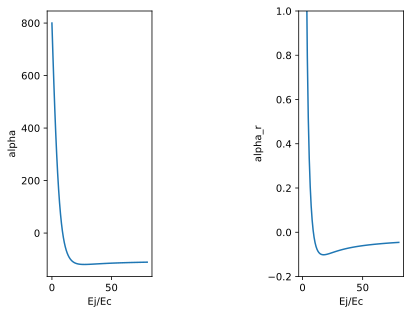

In [ ]:
plt.plot(x,alpha)
...

Indeed we see that the anharmonicity decays with the inverse of $E_{J}/E_{C}$ for small values of $E_{J}/E_{C}$ before reaching a minimum just before $E_{J}/E_{C} \approx 20.0$, then changing sign and approaching zero as $E_{J}/E_{C}$ approaches infinity. This matches very closely to the results found in Figure 5 of Phys. Rev. A 76, 042319 (2007). 

### Dephasing Time (T2)

We can estimate the qubit dephasing time (T2) due to charge noise by the following expression: $T_{2} = \frac{\hbar}{A\pi |\epsilon_{1}|}$ where $A$ is on the order of $1E-4$ according to Phys. Rev. A 76, 042319 (2007). Since this is essentially just the inverse of the charge dispersion for $\epsilon_{1}$, we can easily calculate T2 as a function of $E_{J}/E_{C}$ with the following:

Text(0, 0.5, 'T2 (sec)')

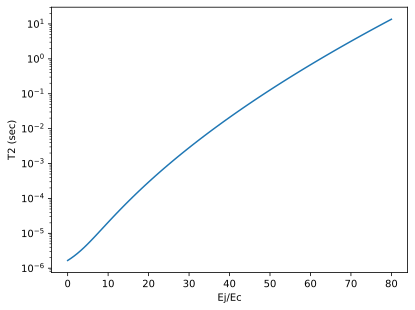

In [ ]:
...
plt.plot(x, T2)
plt.yscale("log")

Indeed, we see that the dephasing time increases exponentially with increasing $E_{J}/E_{C}$, which is one of the critical features of the transmon qubit. By increasing the $E_{J}/E_{C}$ ratio, we reduce sensitivity to charge noise without sacrificing too much anharmonicity, resulting in greatly improved dephasing time. This plot matches very closely to Fig. 5(c) in Phys. Rev. A 76, 042319 (2007).

Ending on next page ...

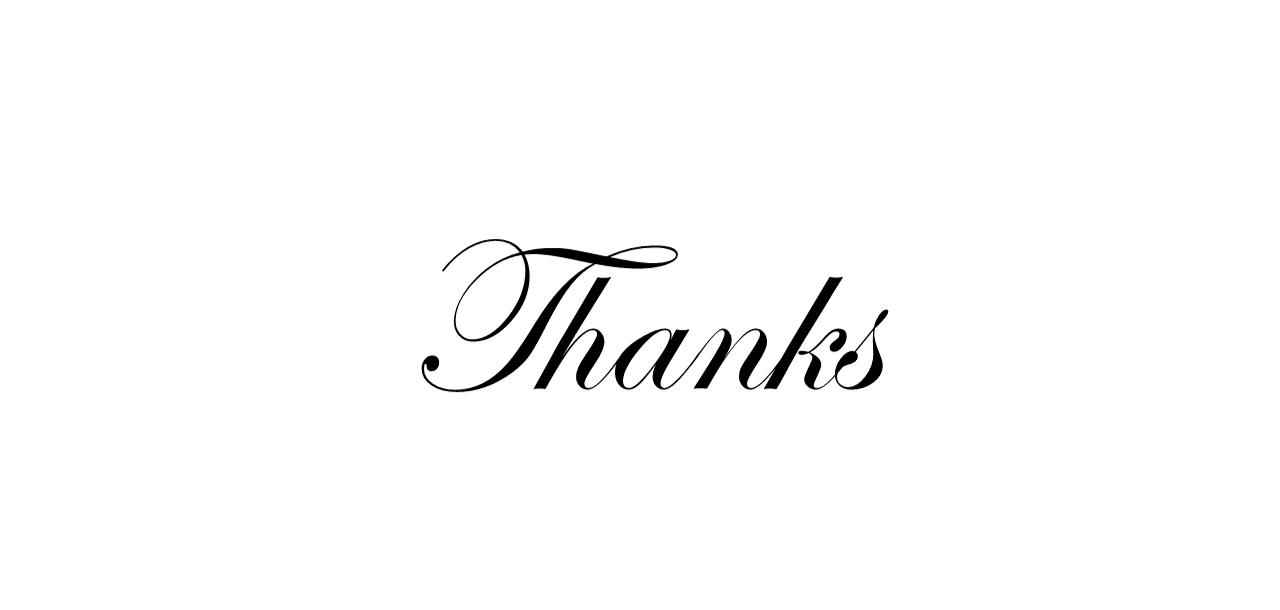